# Lesson: 1_sMRI Modalities

## Objectives
- Visualize structural MR images (NifTi)

## Python Requirements
- [matplotlib](https://matplotlib.org/)
- [nibabel](https://nipy.org/nibabel/)
- [nilearn](https://nilearn.github.io/index.html)

## For neuroimaging studies, a good practice is to use Brain Imaging Data Structure (BIDS) to organize imaging dataset
- See this [paper](https://www.nature.com/articles/sdata201644) and [starter-kit](https://github.com/bids-standard/bids-starter-kit/wiki) for more details
- See this [tutorial](https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI) for a BIDS carpentry lesson 
- Here is a typical directory structure for a sample dataset

<img src="../fig/episode_1/bids_structure.jpeg" width="600">

## For the sake of simplicity, in this tutorial we will use a pre-organized data from nilearn datasets

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting

## Select dataset 
- Haxby ([nilearn](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_haxby.html)): Does not have T2 images
- Balloon Analog Risk-taking Task from [OpenNeuro](https://openneuro.org/datasets/ds000001/versions/00006)

In [32]:
dataset = 'OpenNeuro' #Haxby or #OpenNeuro

if dataset in ['Haxby', 'haxby']: 
      haxby_dataset = datasets.fetch_haxby()
      T1_filename = haxby_dataset.anat[0]

elif dataset in ['OpenNeuro','openneuro']:
      local_data_dir = '../local_data/'
      subject_id = 'sub-02'
      T1_filename = local_data_dir + '{}/anat/{}_T1w.nii.gz'.format(subject_id,subject_id)
      T2_filename = local_data_dir + '{}/anat/{}_inplaneT2.nii.gz'.format(subject_id,subject_id)

else: 
      print('Unknown dataset: {}'.format(dataset))

print('Using {} dataset'.format(dataset))

Using OpenNeuro dataset


### Read T1w and T2w anatomical images

In [42]:
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

print('T1 image path: {},\n\timage shape: {}'.format(T1_filename, T1_img.shape))
print('\tintensity value range: min: {}, max: {}'.format(np.min(T1_data.ravel()),np.max(T1_data.ravel())))
print('\nT2 image path: {},\n\timage shape: {}'.format(T2_filename, T2_img.shape))
print('\tintensity value range: min: {}, max: {}'.format(np.min(T2_data.ravel()),np.max(T2_data.ravel())))

T1 image path: ../local_data/sub-02/anat/sub-02_T1w.nii.gz,
	image shape: (160, 192, 192)
	intensity value range: min: 0.0, max: 1500.0

T2 image path: ../local_data/sub-02/anat/sub-02_inplaneT2.nii.gz,
	image shape: (128, 128, 34)
	intensity value range: min: 0.0, max: 4095.0


### Visualize image
 - Single slice from three views: Coronal, Sagittal, Axial

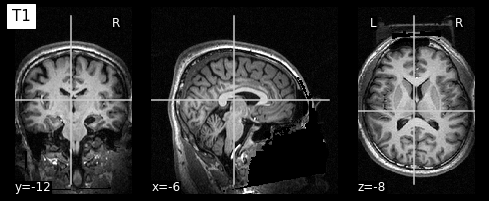

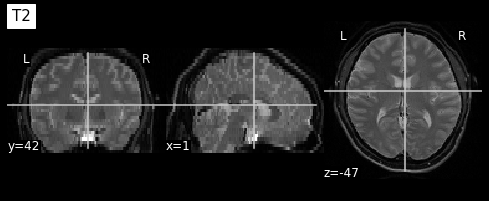

In [43]:
plotting.plot_anat(T1_filename, title="T1", vmax=500)
plotting.plot_anat(T2_filename, title="T2", vmax=2000)


### Visualize image
 - Slice montage from three views: Coronal, Sagittal, Axial

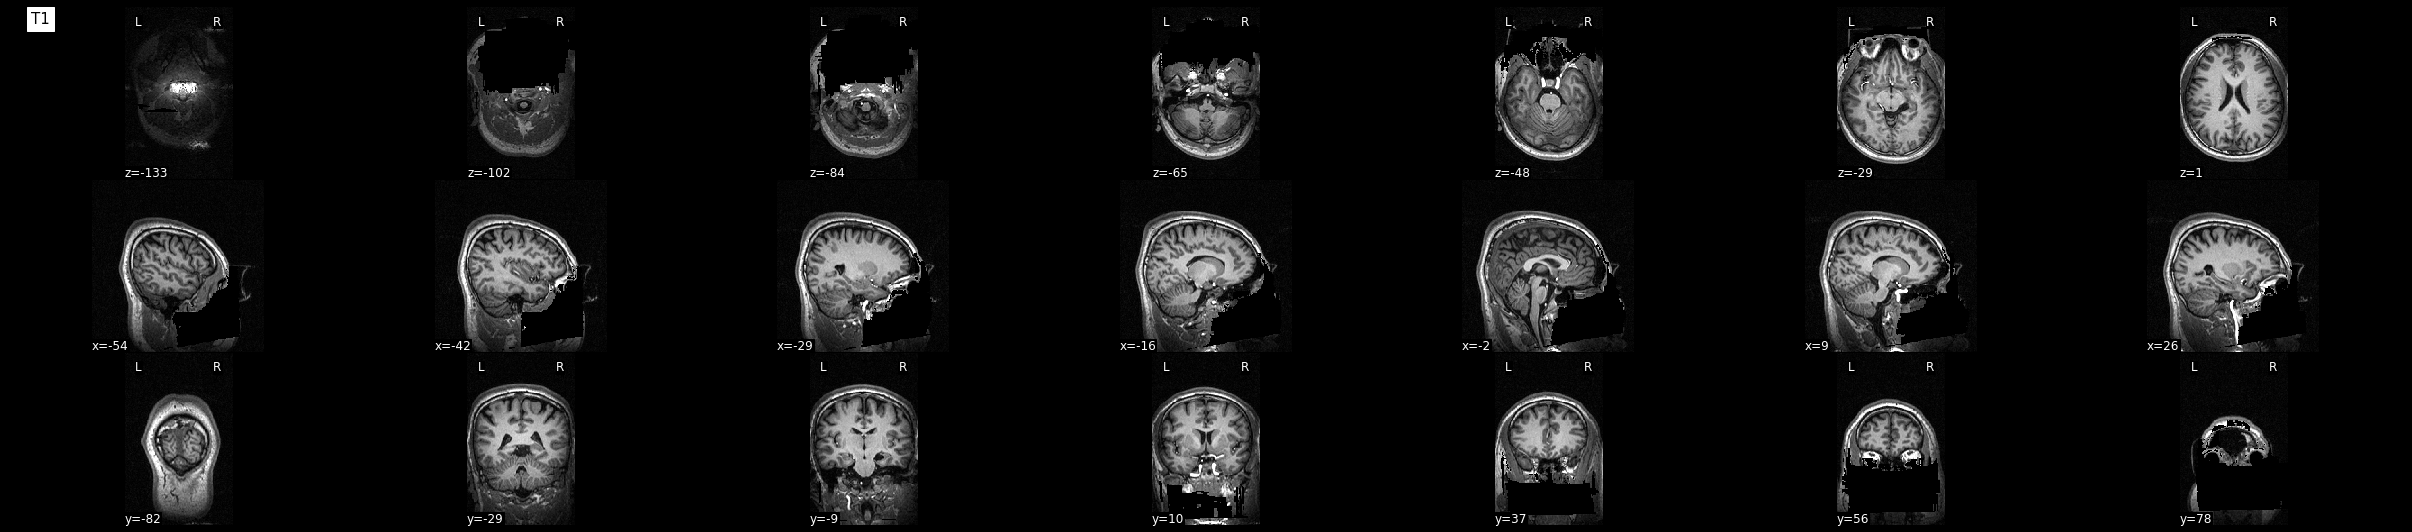

In [46]:
plotting.plot_anat(T1_filename, title="T1", display_mode='mosaic', vmax=500)

### Visualize image
 - Interactive scroll of slices

/Users/nikhil/anaconda3/envs/napari/lib/python3.6/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



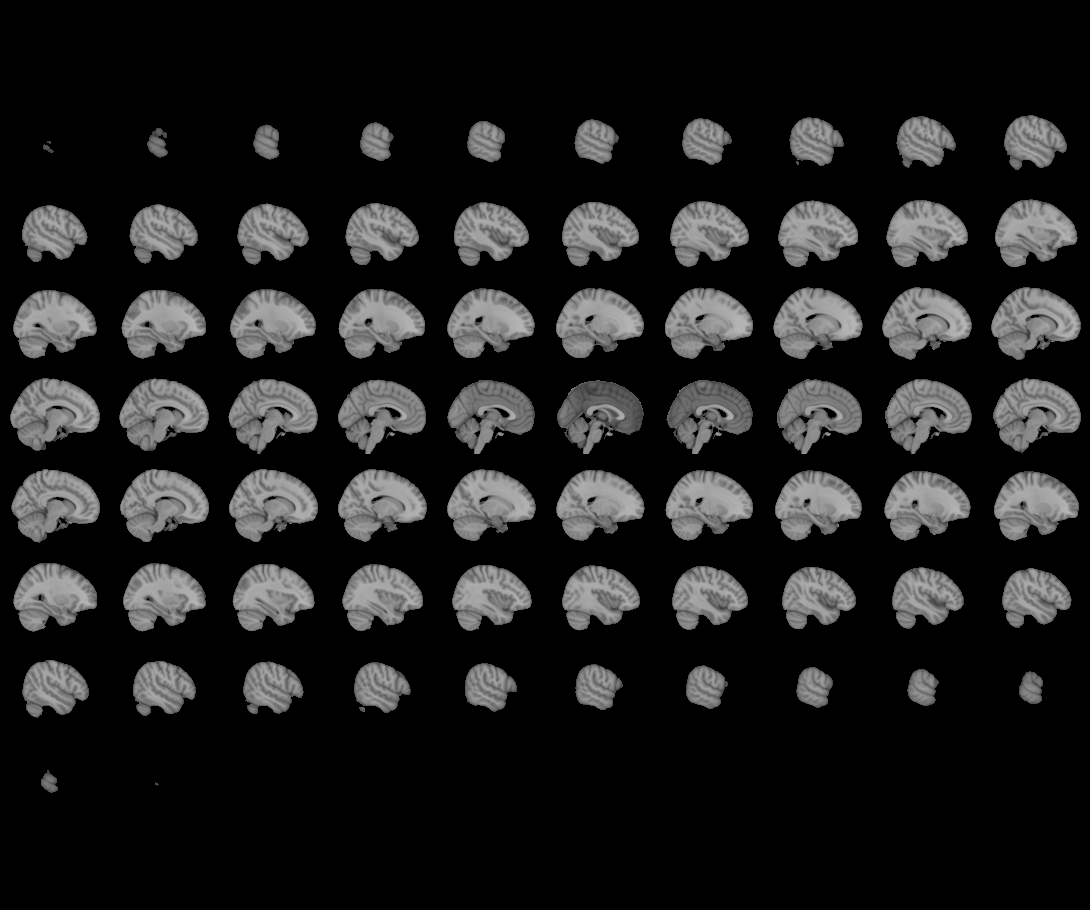
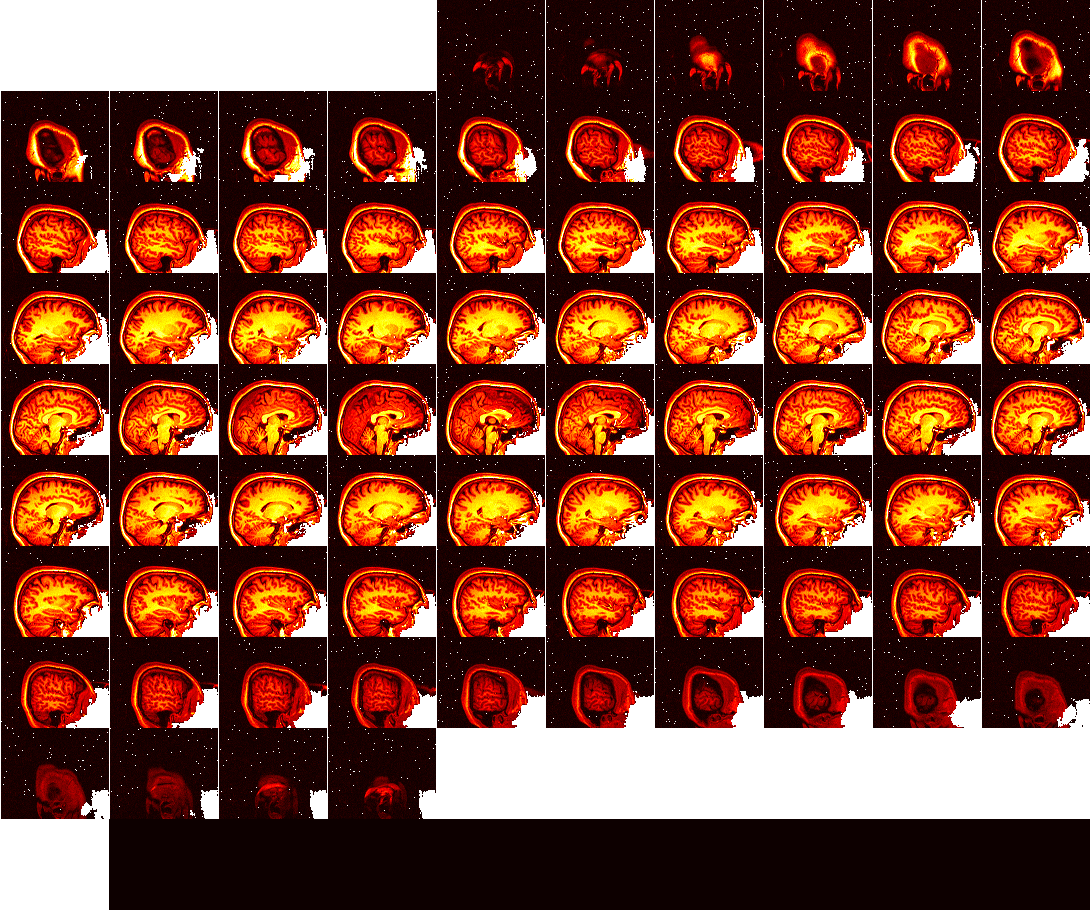

In [47]:
view = plotting.view_img(img, colorbar=True, vmax=500)
view

Note: we will discuss the x,y,z coordinate system in future lessons! 